## No rooted-out branching - Method 2

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
import numpy as np

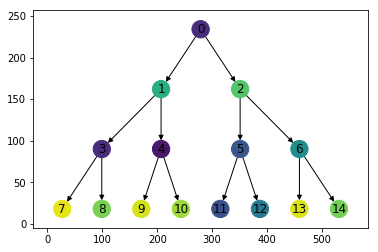

In [2]:
G = nx.balanced_tree(create_using=nx.DiGraph(), h=3, r=2)
N = nx.number_of_nodes(G)
layout = graphviz_layout(G, prog='dot')
#init = np.random.normal(loc=0, scale=4, size=N)
init = np.random.rand(N)
nx.draw_networkx(G, pos=layout, node_color=init, vmin=0, vmax=1)

Find root, $r$

In [3]:
root = [n for n,d in G.in_degree() if d==0][0]
root

0

Children of root, $\{ c_0, c_1 \}$

In [4]:
c = [n for n in G.neighbors(root)]
c

[1, 2]

Reverse the direction of an edge not connected to the root

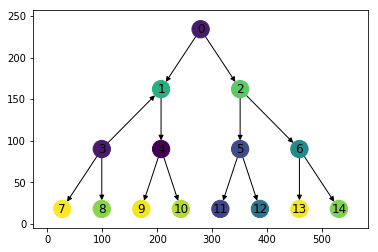

In [5]:
G.remove_edge(1, 3)
G.add_edge(3,1)
nx.draw_networkx(G, pos=layout, node_color=init)

Simulate simple consensus

In [6]:
A = nx.adjacency_matrix(G).transpose()
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D - A
np.linalg.matrix_rank(L)

13

In [7]:
from scipy.integrate import solve_ivp

In [8]:
f1 = lambda t,x: np.asarray(-L.dot(x))[0]
res1 = solve_ivp(fun=f1, t_span=[0,10], y0=init)

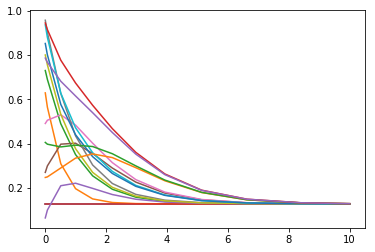

In [9]:
for i in np.arange(0,N):
    plt.plot(res1.t, res1.y[i,:])

In [10]:
res1.y[:,-1]

array([0.1267251 , 0.12730638, 0.12675769, 0.12781501, 0.12725741,
       0.12701466, 0.1270266 , 0.12785982, 0.12785134, 0.12752774,
       0.12752318, 0.12816558, 0.12817413, 0.12830654, 0.12829798])

### Symmetrization

In [11]:
from scipy.linalg import null_space
from scipy.linalg import solve_lyapunov

In [12]:
Q = null_space(null_space(L).transpose()).transpose()
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [13]:
f2 = lambda t,x: -eqL.dot(x)
res2 = solve_ivp(fun=f2, t_span=[0,10], y0=init)

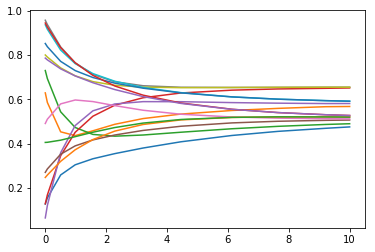

In [14]:
for i in np.arange(0,N):
    plt.plot(res2.t, res2.y[i,:], label=i)

Create undirected graph from the equivalent Laplacian

In [15]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [16]:
nx.is_connected(eqG)

True

In [17]:
np.sum(eqL, axis=1)

array([-1.25333771e-15,  2.18770314e-15, -7.14706072e-16,  1.90819582e-16,
        1.23165367e-16,  7.51135265e-16,  9.99200722e-16, -1.31492039e-15,
       -2.56739074e-16,  4.40619763e-16,  2.22044605e-16, -2.35922393e-16,
       -1.29063427e-15,  3.88578059e-16, -3.33066907e-16])

In [18]:
np.diag(eqL)

array([0.68168188, 1.81541243, 1.21291032, 0.80257239, 1.21690247,
       1.19015212, 1.19015212, 0.72703107, 0.72703107, 0.74620334,
       0.74620334, 0.73593686, 0.73593686, 0.73593686, 0.73593686])

In [19]:
res2.y[:,-1]

array([0.47531971, 0.56772977, 0.48971601, 0.65146716, 0.58114573,
       0.50641634, 0.51165081, 0.65492407, 0.6549159 , 0.59159137,
       0.59158697, 0.51976301, 0.51977125, 0.52692281, 0.52691457])

Final result

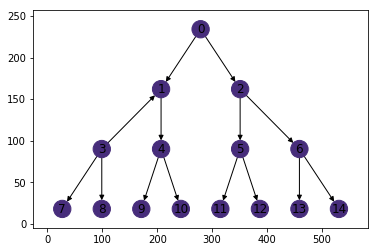

In [20]:
nx.draw_networkx(G, node_color = res1.y[:,-1], pos=layout, vmin=0, vmax=1)

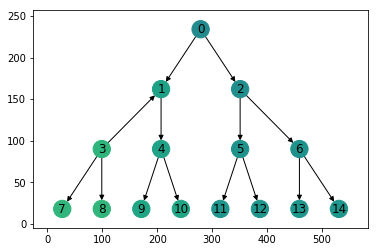

In [21]:
nx.draw_networkx(G, node_color = res2.y[:,-1], pos=layout, vmin=0, vmax=1)

In [22]:
np.linalg.matrix_rank(eqL)

13